In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random

In [2]:
train_data = pd.read_csv('preprocessed_train_40.csv')
test_data = pd.read_csv('preprocessed_test_40.csv')



In [3]:
print('Dimensions of the Training set:',train_data.shape)
print('Dimensions of the Testing set:',test_data.shape)



Dimensions of the Training set: (12000, 83)
Dimensions of the Testing set: (3999, 83)


In [4]:
train_data.head(5)

,Unnamed: 0,Dst Port,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_0,Protocol_6,Protocol_17
0,1751,445,02/03/2018 11:56:54,932785,5,3,277,172,140,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,4342,3389,02/03/2018 12:36:44,119119923,108,106,51,5406,51,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,10541,0,02/03/2018 01:47:10,480525,5,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
3,2698,445,02/03/2018 12:11:57,350527,3,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,1757,3389,02/03/2018 11:54:58,119814826,113,111,51,5661,51,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0


In [5]:
train_data.pop("Unnamed: 0")
test_data.pop("Unnamed: 0")

0       1547
1        897
2       1601
3       3162
4       1597
        ... 
3994    3237
3995    2742
3996    1150
3997    1436
3998    3110
Name: Unnamed: 0, Length: 3999, dtype: int64

In [7]:
train_data.pop("Timestamp")
test_data.pop("Timestamp")

0       02/03/2018 10:50:10
1       02/03/2018 09:35:20
2       02/03/2018 02:49:01
3       02/03/2018 05:25:13
4       02/03/2018 02:30:14
               ...         
3994    02/03/2018 03:15:14
3995    02/03/2018 03:51:39
3996    02/03/2018 02:41:55
3997    02/03/2018 03:45:06
3998    02/03/2018 03:13:11
Name: Timestamp, Length: 3999, dtype: object

In [8]:
train_data = train_data[np.isfinite(train_data).all(1)]
test_data = test_data[np.isfinite(test_data).all(1)]

In [9]:
print('Label distribution Training set:')
print(train_data['Label'].value_counts())
print()
print('Label distribution Test set:')
print(test_data['Label'].value_counts())

Label distribution Training set:
1    11421
0      579
Name: Label, dtype: int64

Label distribution Test set:
1    3223
0     776
Name: Label, dtype: int64


In [10]:
print('Dimensions of the Training set:',train_data.shape)
print('Dimensions of the Testing set:',test_data.shape)

Dimensions of the Training set: (12000, 81)
Dimensions of the Testing set: (3999, 81)


In [11]:
to_drop_Benign = [0,0]
to_drop_Infilteration = [0,1]

Benign_df=train_data[train_data['Label'].isin(to_drop_Benign)];
Infilteration_df=train_data[train_data['Label'].isin(to_drop_Infilteration)];

#test
Benign_df_test=test_data[test_data['Label'].isin(to_drop_Benign)];
Infilteration_df_test=test_data[test_data['Label'].isin(to_drop_Infilteration)];

print('Train:')
print('Dimensions of Benign:' ,Benign_df.shape)
print('Dimensions of Infilteration:' ,Infilteration_df.shape)
print()
print('Test:')
print('Dimensions of Begin:' ,Benign_df_test.shape)
print('Dimensions of Infilteration:' ,Infilteration_df_test.shape)

Train:
Dimensions of Benign: (579, 81)
Dimensions of Infilteration: (12000, 81)

Test:
Dimensions of Begin: (776, 81)
Dimensions of Infilteration: (3999, 81)


In [12]:
#Split dataframes into X & Y
# X Properties, Y result variables

X_Benign = Benign_df.drop('Label',1)
Y_Benign = Benign_df.Label

X_Infilteration = Infilteration_df.drop('Label',1)
Y_Infilteration = Infilteration_df.Label


#test
X_Benign_test = Benign_df_test.drop('Label',1)
Y_Benign_test = Benign_df_test.Label

X_Infilteration_test = Infilteration_df_test.drop('Label',1)
Y_Infilteration_test = Infilteration_df_test.Label


In [13]:
from sklearn import preprocessing

scaler2 = preprocessing.StandardScaler().fit(X_Infilteration)
X_Infilteration=scaler2.transform(X_Infilteration)


# test data

scaler4 = preprocessing.StandardScaler().fit(X_Infilteration_test)
X_Infilteration_test=scaler4.transform(X_Infilteration_test)

# SVM

In [14]:
import time

In [15]:
from sklearn.svm import SVC

#clf_SVM_Benign=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_Infilteration=SVC(kernel='linear', C=1.0, random_state=0)
train0 = time.time()


#clf_SVM_Benign.fit(X_Benign, Y_Benign.astype(int))
clf_SVM_Infilteration.fit(X_Infilteration, Y_Infilteration.astype(int))
train1 = time.time() - train0


In [16]:
test0 = time.time()
Y_Infilteration_pred=clf_SVM_Infilteration.predict(X_Infilteration_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Infilteration_test, Y_Infilteration_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,542,234
1,340,2883


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.99750 (+/- 0.00671)
Precision: 0.99754 (+/- 0.00815)
Recall: 0.99938 (+/- 0.00373)
F-measure: 0.99845 (+/- 0.00415)
train_time:0.343s

test_time:0.022s



In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Infilteration_test, Y_Infilteration_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.7964809152003479
Threshold: %f [2 1 0]
FPR: %f [0.         0.30154639 1.        ]
TPR: %f [0.         0.89450822 1.        ]


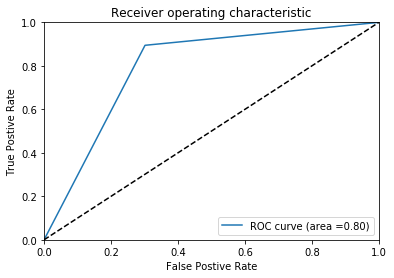

In [19]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()

In [20]:
from sklearn.svm import SVC

clf_SVM_Infilteration=SVC(kernel='rbf', C=1.0, random_state=0)
train0 = time.time()

clf_SVM_Infilteration.fit(X_Infilteration, Y_Infilteration.astype(int))
train1 = time.time() - train0

In [21]:
test0 = time.time()
Y_Infilteration_pred=clf_SVM_Infilteration.predict(X_Infilteration_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Infilteration_test, Y_Infilteration_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,538,238
1,7,3216


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.99800 (+/- 0.00374)
Precision: 0.99877 (+/- 0.00409)
Recall: 0.99876 (+/- 0.00412)
F-measure: 0.99876 (+/- 0.00232)
train_time:0.396s

test_time:0.104s



In [23]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Infilteration_test, Y_Infilteration_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.8455635397641309
Threshold: %f [2 1 0]
FPR: %f [0.         0.30670103 1.        ]
TPR: %f [0.         0.99782811 1.        ]


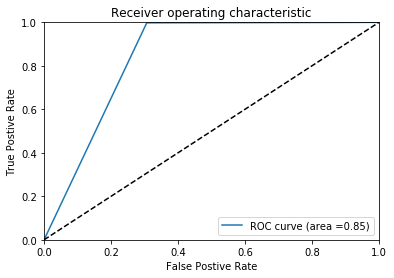

In [24]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()

In [25]:
from sklearn.svm import SVC

clf_SVM_Infilteration=SVC(kernel='poly', C=1.0, random_state=0)
train0 = time.time()

clf_SVM_Infilteration.fit(X_Infilteration, Y_Infilteration.astype(int))
train1 = time.time() - train0

In [26]:
test0 = time.time()
Y_Infilteration_pred=clf_SVM_Infilteration.predict(X_Infilteration_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Infilteration_test, Y_Infilteration_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,33,743
1,0,3223


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.95124 (+/- 0.01435)
Precision: 0.94328 (+/- 0.01573)
Recall: 0.99969 (+/- 0.00186)
F-measure: 0.97065 (+/- 0.00836)
train_time:0.248s

test_time:0.043s



In [28]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Infilteration_test, Y_Infilteration_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.5212628865979381
Threshold: %f [2 1 0]
FPR: %f [0.         0.95747423 1.        ]
TPR: %f [0. 1. 1.]


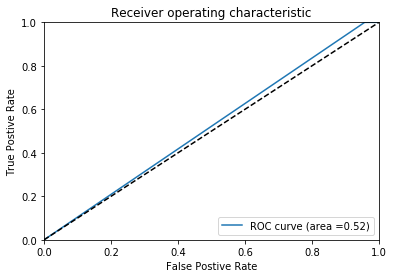

In [29]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()

In [30]:
from sklearn.svm import SVC

clf_SVM_Infilteration=SVC(kernel='sigmoid', C=1.0, random_state=0)
train0 = time.time()

clf_SVM_Infilteration.fit(X_Infilteration, Y_Infilteration.astype(int))
train1 = time.time() - train0

In [31]:
test0 = time.time()
Y_Infilteration_pred=clf_SVM_Infilteration.predict(X_Infilteration_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Infilteration_test, Y_Infilteration_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,145,631
1,337,2886


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.96349 (+/- 0.02262)
Precision: 0.96203 (+/- 0.02512)
Recall: 0.99411 (+/- 0.00585)
F-measure: 0.97776 (+/- 0.01357)
train_time:2.511s

test_time:0.201s



In [33]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Infilteration_test, Y_Infilteration_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.5411473510304481
Threshold: %f [2 1 0]
FPR: %f [0.         0.81314433 1.        ]
TPR: %f [0.         0.89543903 1.        ]


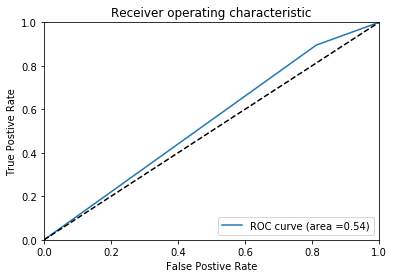

In [34]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()